In [2]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import warnings;
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

    ****************************************** DATA PREPROCESSING **********************************************************

In [5]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [9]:
df.duplicated().sum()

29

In [10]:
df.drop_duplicates()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [12]:
catvars=df.select_dtypes(include='object').columns
numvars=df.select_dtypes(include=['float32','float64','int32','int64']).columns
catvars

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [13]:
numvars

Index(['Inches', 'Price'], dtype='object')

In [14]:
for col in df.columns:
    print(f"the details of {col} is {df[col].unique()}")
    print("-"*75)

the details of Company is ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
the details of TypeName is ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
the details of Inches is [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
the details of ScreenResolution is ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 

In [15]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [16]:
df['Ram']=df['Ram'].str.replace('GB','').astype('int32')
df['Weight']=df['Weight'].str.replace('kg','').astype('float32')

In [17]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


  *********************************** EXPLORATORY DATA ANALYSIS *********************************************

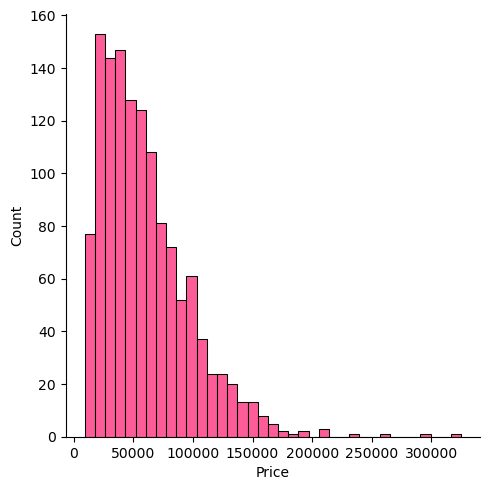

In [18]:
%matplotlib inline
sns.displot(df['Price'],color='#FB2576')

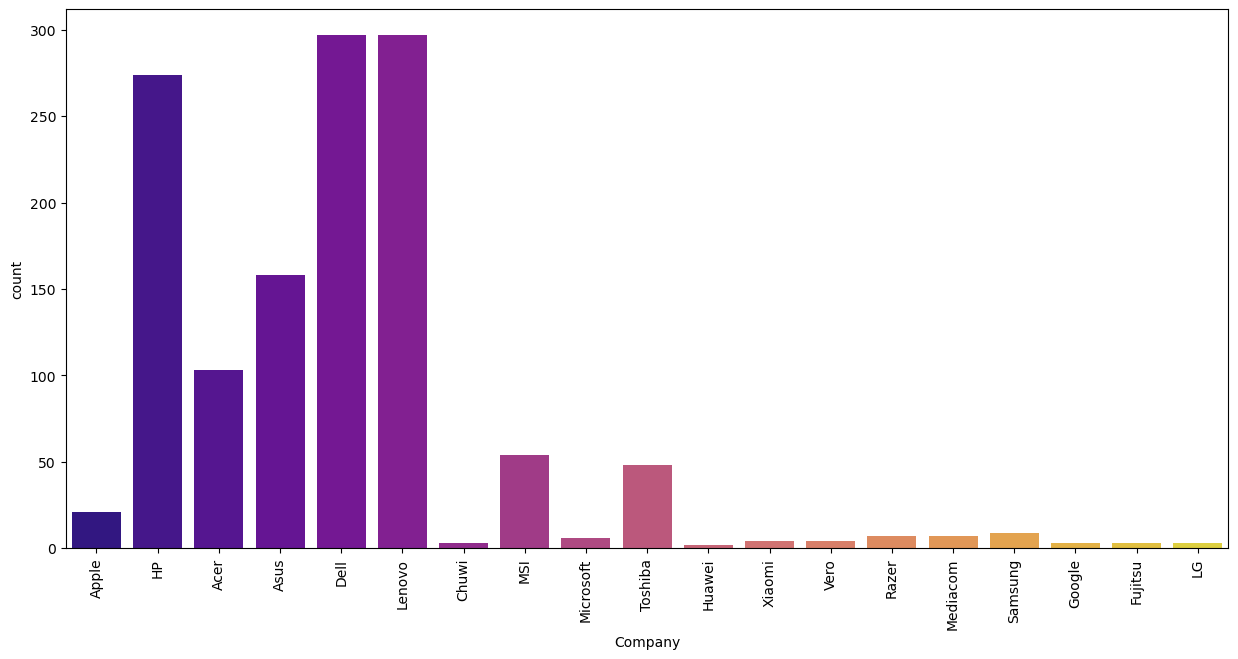

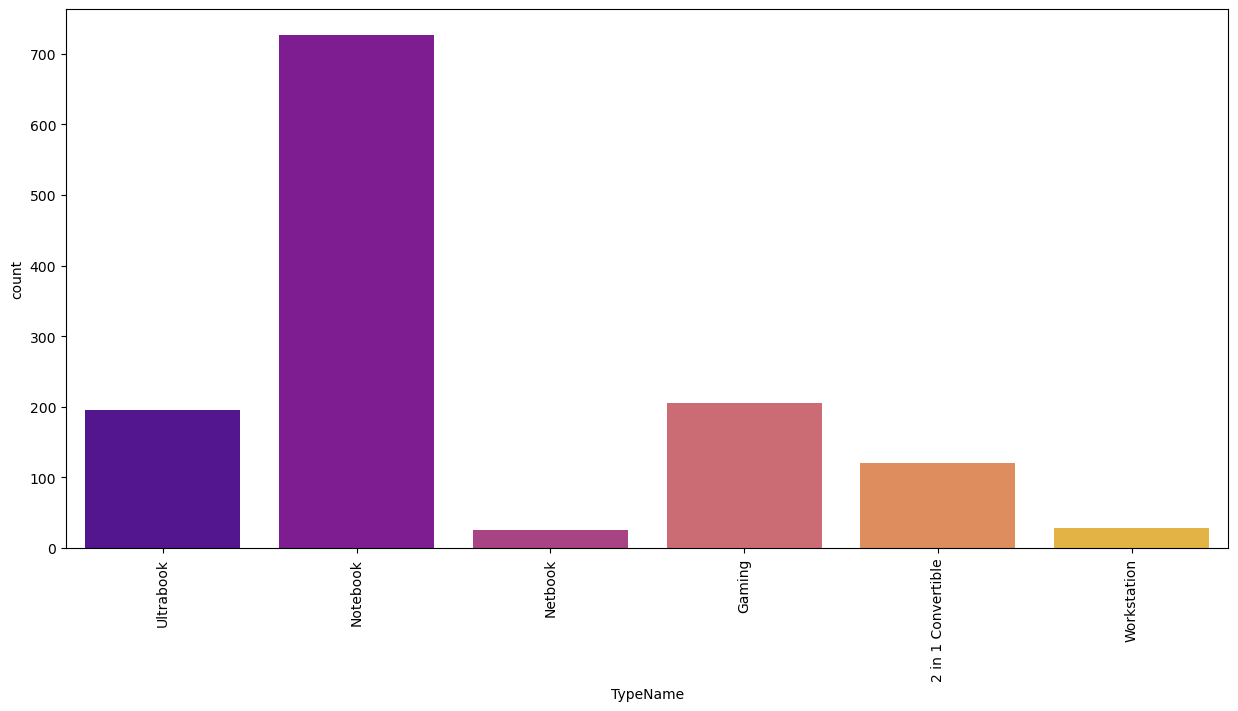

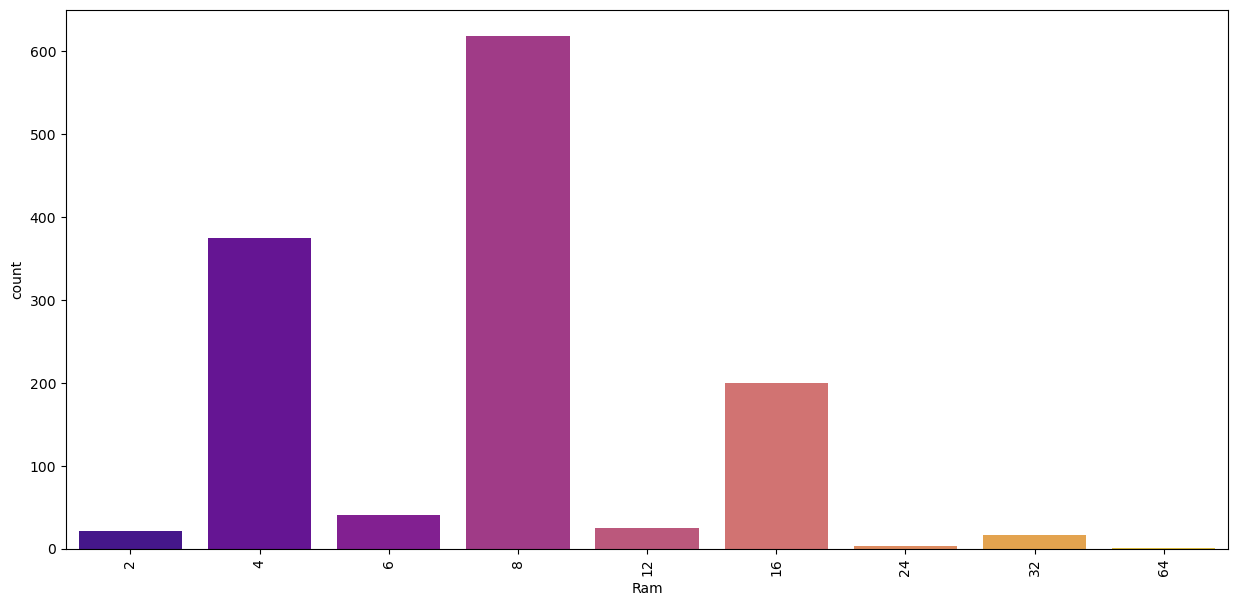

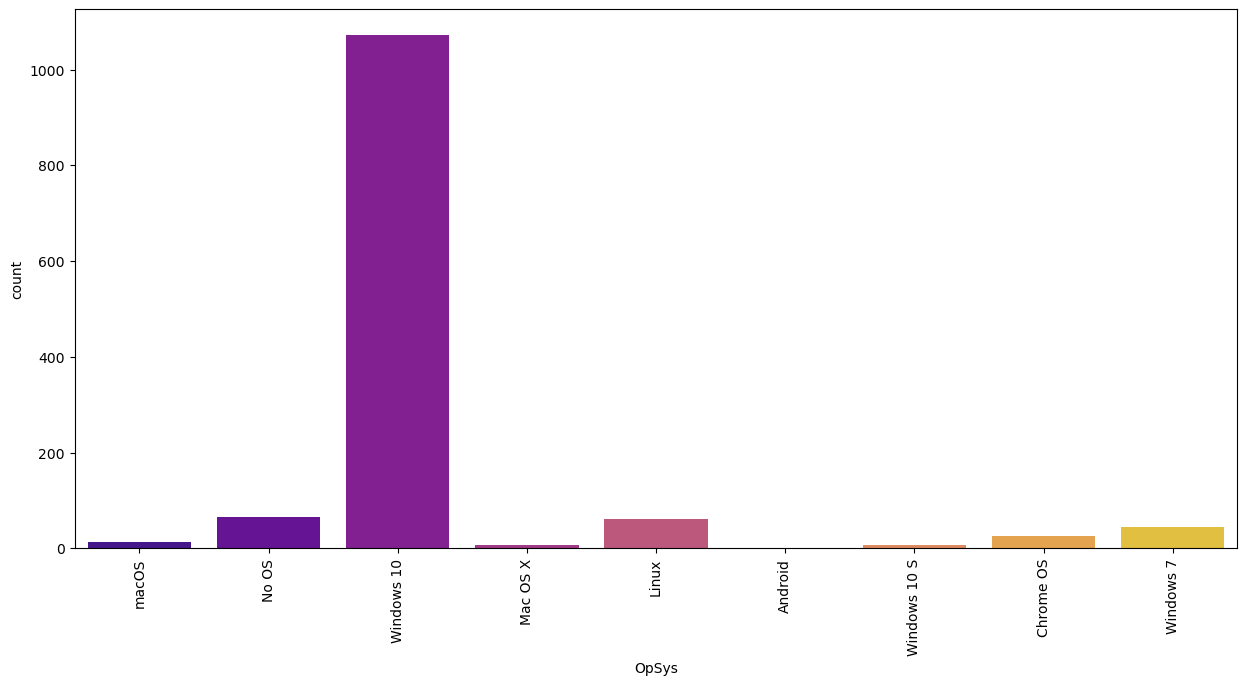

In [19]:
def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(df[col],palette='plasma')
    plt.xticks(rotation='vertical')
toview=['Company','TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

<AxesSubplot:xlabel='Ram', ylabel='Price'>

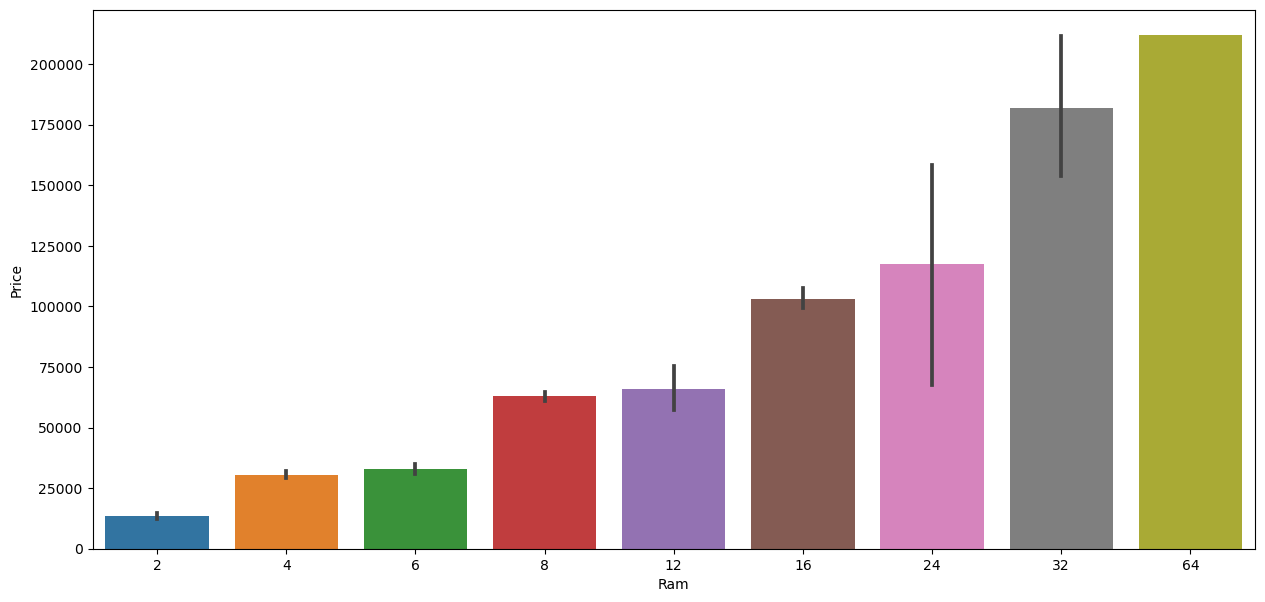

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['Ram'],y=df['Price'],data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

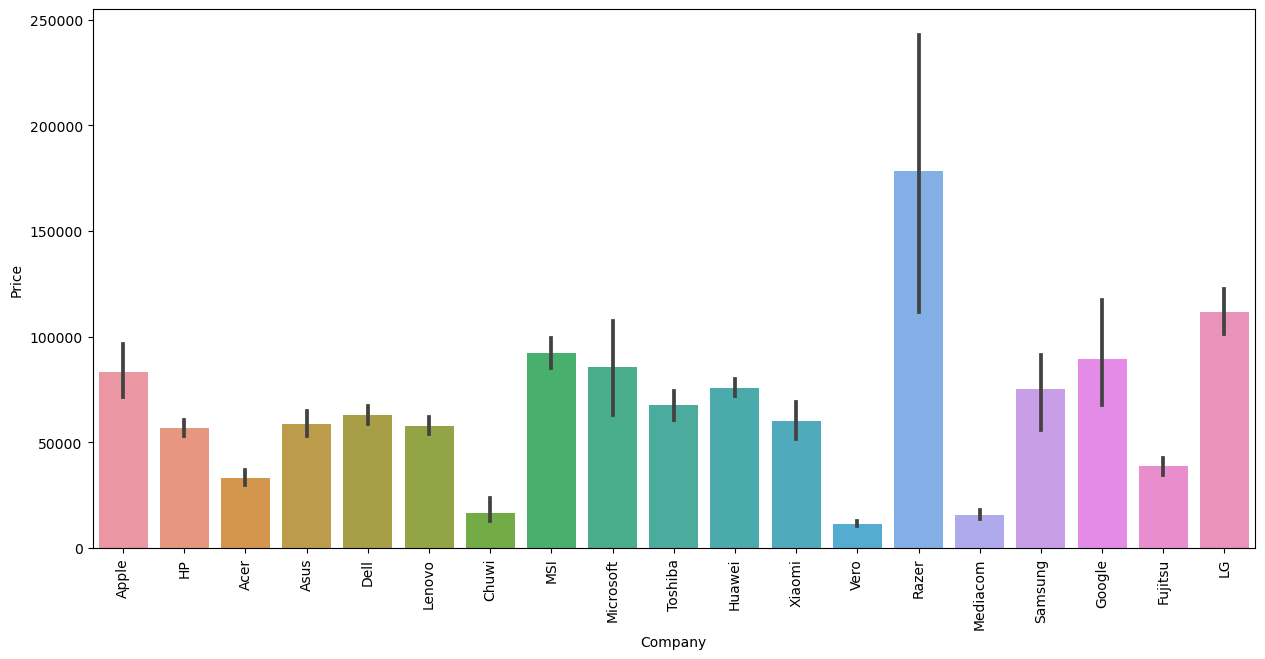

In [21]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['Company'],y=df['Price'],data=df)
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='Inches', ylabel='Price'>

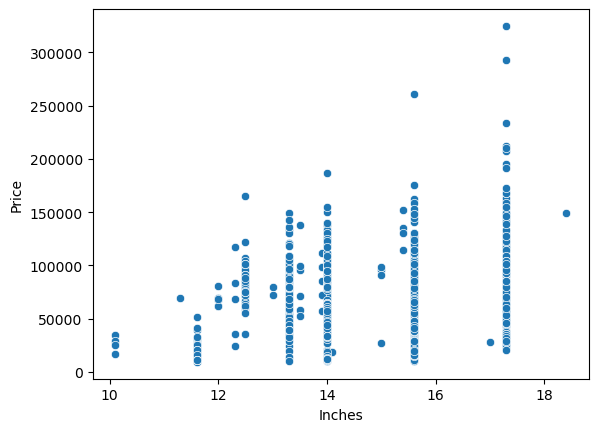

In [22]:
sns.scatterplot(x=df['Inches'],y=df['Price'],data=df)

In [23]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [24]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [25]:
df['TouchScreen'].value_counts()

0    1111
1     192
Name: TouchScreen, dtype: int64

In [26]:
df['IPSPanel']=df['ScreenResolution'].apply(lambda x : 1 if 'IPS Panel' in x else 0)

In [27]:
df['IPSPanel'].value_counts()

0    938
1    365
Name: IPSPanel, dtype: int64

<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

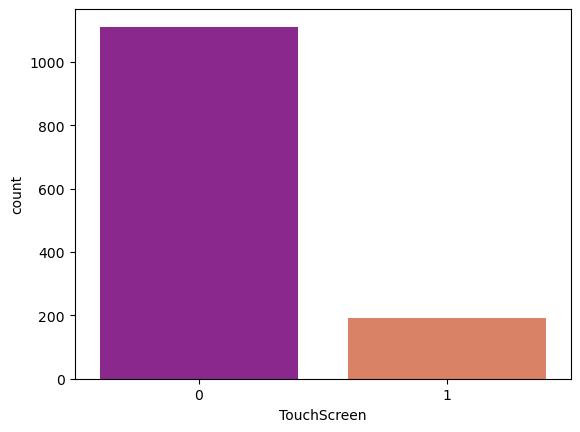

In [28]:
sns.countplot(df['TouchScreen'],palette='plasma')

<AxesSubplot:xlabel='IPSPanel', ylabel='count'>

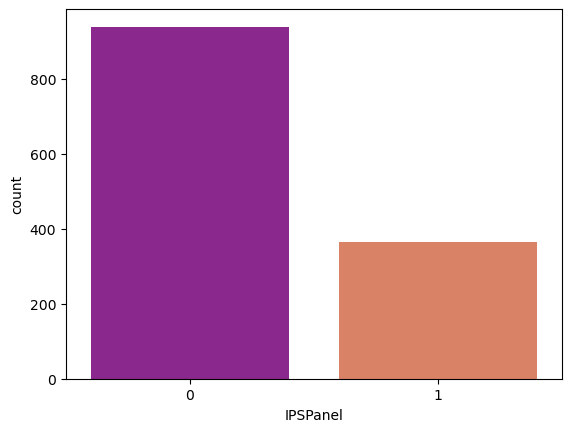

In [29]:
sns.countplot(df['IPSPanel'],palette='plasma')

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

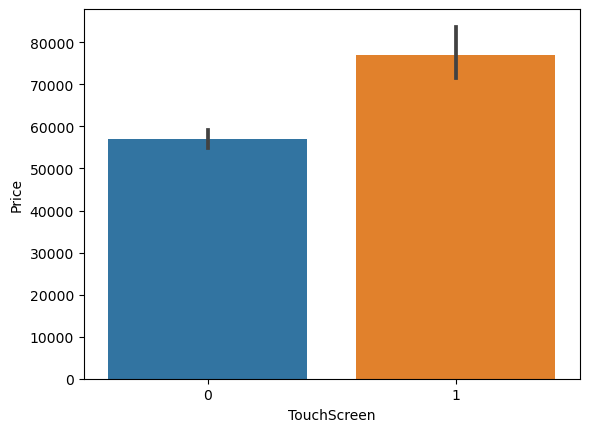

In [30]:
sns.barplot(x=df['TouchScreen'],y=df['Price'],data=df)

<AxesSubplot:xlabel='IPSPanel', ylabel='Price'>

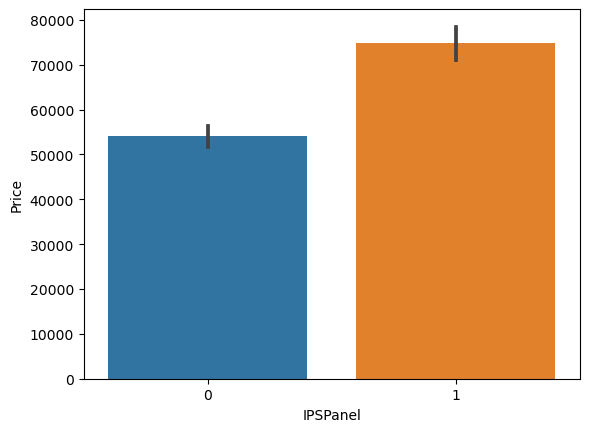

In [31]:
sns.barplot(x=df['IPSPanel'],y=df['Price'],data=df)

In [32]:
split_res=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [33]:
df['X-Res']=split_res[0]

In [34]:
df['Y-Res']=split_res[1]

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSPanel,X-Res,Y-Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [36]:
df['X-Res']=df['X-Res'].str.findall(r'\d+').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSPanel,X-Res,Y-Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [37]:
df['X-Res']=df['X-Res'].astype(int)
df['Y-Res']=df['Y-Res'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPSPanel          1303 non-null   int64  
 13  X-Res             1303 non-null   int32  
 14  Y-Res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


<AxesSubplot:>

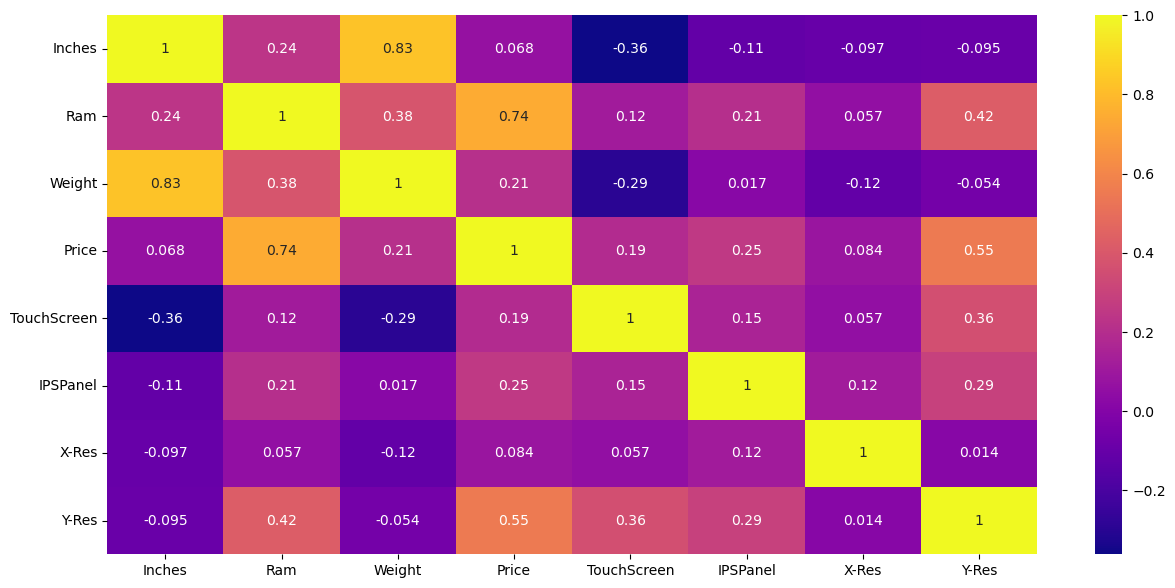

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [39]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPSPanel       0.252208
X-Res          0.083832
Y-Res          0.552809
Name: Price, dtype: float64

In [40]:
df['PPI']=(((df['X-Res']**2) + (df['Y-Res']**2))**0.5/df['Inches']).astype(float)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '90.58340172449303'),
  Text(1, 0, '100.45466986113651'),
  Text(2, 0, '106.11306214269258'),
  Text(3, 0, '107.98564559226952'),
  Text(4, 0, '111.1413368676404'),
  Text(5, 0, '111.93520355955211'),
  Text(6, 0, '117.82653006268643'),
  Text(7, 0, '119.7232157653423'),
  Text(8, 0, '124.85570541621553'),
  Text(9, 0, '125.36742798669837'),
  Text(10, 0, '127.33567457123111'),
  Text(11, 0, '127.67794013309688'),
  Text(12, 0, '135.0942111925629'),
  Text(13, 0, '138.46177587823902'),
  Text(14, 0, '141.21199808219862'),
  Text(15, 0, '146.86047800548656'),
  Text(16, 0, '155.39594990651284'),
  Text(17, 0, '157.3505121487356'),
  Text(18, 0, '158.48253022174808'),
  Text(19, 0, '161.72539083525606'),
  Text(20, 0, '162.40629351131793'),
  Text(21, 0, '165.6321180513006'),
  Text(22, 0, '169.7

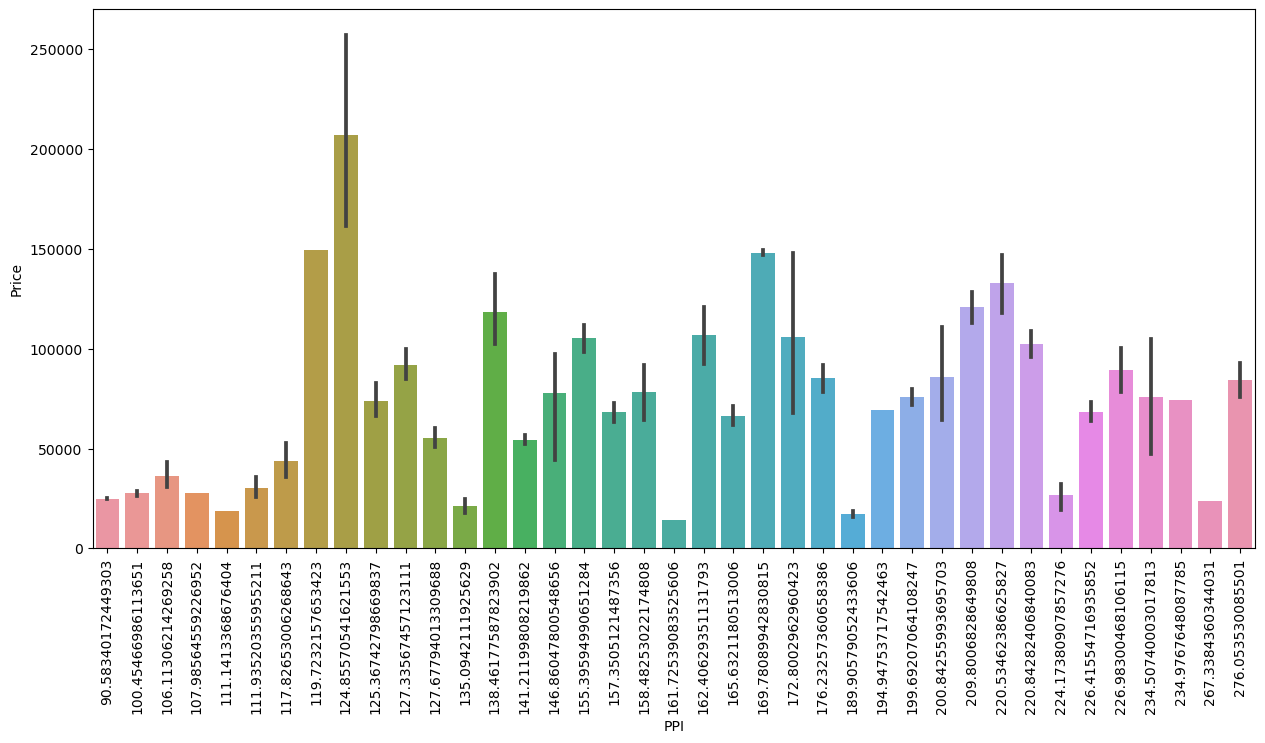

In [41]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['PPI'],y=df['Price'],data=df)
plt.xticks(rotation='vertical')

In [42]:
df.corr()['Price']['PPI']

0.34833065061737395

In [43]:
df.drop(["ScreenResolution","X-Res","Y-Res","Inches"],axis=1,inplace=True)

In [44]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSPanel,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [45]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [46]:
df['Cpu_Name']=df['Cpu'].apply(lambda x:' '.join(x.split()[:3]))
df['Cpu_Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [47]:
def processortype(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else :
            return 'AMD Processor'
    

In [48]:
df['Cpu_Name']=df['Cpu_Name'].apply(lambda x:processortype(x))

In [49]:
df['Cpu_Name'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: Cpu_Name, dtype: int64

<AxesSubplot:xlabel='Cpu_Name', ylabel='Price'>

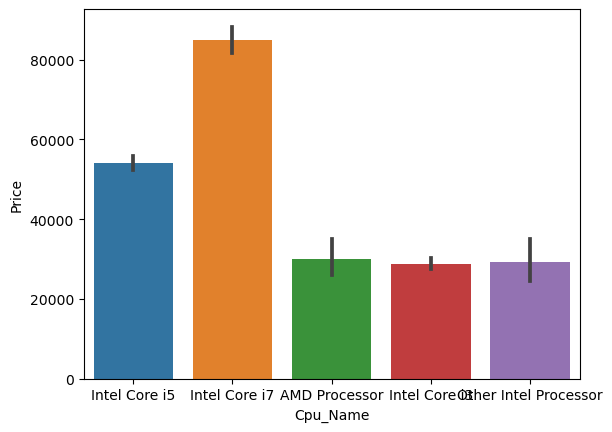

In [50]:
sns.barplot(x=df['Cpu_Name'],y=df['Price'],data=df)

In [51]:
df.drop(["Cpu"],axis=1,inplace=True)

In [52]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [53]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [54]:
new_memory=df['Memory'].str.split('+',n=1,expand=True)
new_memory

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [55]:
df['First']=new_memory[0]
df['First']=df['First'].str.strip()
df['First']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: First, Length: 1303, dtype: object

In [56]:
def applychanges(value):
    df['Layer1'+value]=df['First'].apply(lambda x:1 if value in x else 0)
listtoapply=['HDD','SSD','Hybrid','FlashStorage']
df['First'].fillna('0',inplace=True)
for value in listtoapply:
    applychanges(value)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSPanel,PPI,Cpu_Name,First,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [57]:
df['First']=df['First'].str.replace(r'\D','')
df['First'].value_counts()

256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: First, dtype: int64

In [58]:
df['Second']=new_memory[1]
def applychanges1(value):
    df['Layer2'+value]=df['Second'].apply(lambda x:1 if value in x else 0)
listtoapply1=['HDD','SSD','Hybrid','FlashStorage']
df['Second']=df['Second'].fillna('0')
for value in listtoapply1:
    applychanges1(value)
df['Second']=df["Second"].str.replace(r'\D','')
df['Second'].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [59]:
df['HDD']=(df['First']*df['Layer1HDD']+df['Second']*df['Layer2HDD'])
df['SSD']=(df['First']*df['Layer1SSD']+df['Second']*df['Layer2SSD'])
df['Hybrid']=(df['First']*df['Layer1Hybrid']+df['Second']*df['Layer2Hybrid'])
df['FlashStorage']=(df['First']*df['Layer1FlashStorage']+df['Second']*df['Layer2FlashStorage'])

In [60]:
df['Hybrid'].value_counts()

        1291
1000      11
508        1
Name: Hybrid, dtype: int64

In [61]:
df.drop(["First","Second","Layer1HDD","Layer2SSD","Layer1SSD","Layer2HDD","Layer1Hybrid","Layer2Hybrid",
         "Layer1FlashStorage","Layer2FlashStorage"],axis=1,inplace=True)

In [62]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPSPanel,PPI,Cpu_Name,HDD,SSD,Hybrid,FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128,,
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,,,,
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256,,
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512,,
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,,256,,


In [63]:
df.drop(["Memory"],axis=1,inplace=True)

In [64]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [65]:
a=df['Gpu'].iloc[1]
print(a.split()[0])

Intel


<AxesSubplot:xlabel='Gpu_Brand', ylabel='count'>

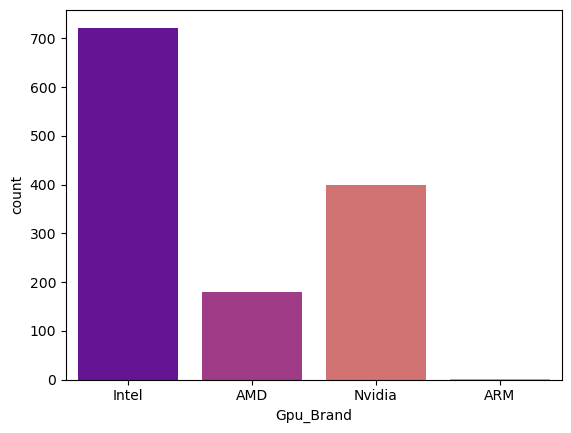

In [66]:
df['Gpu_Brand']=df['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(df['Gpu_Brand'],palette='plasma')

<AxesSubplot:xlabel='Gpu_Brand', ylabel='Price'>

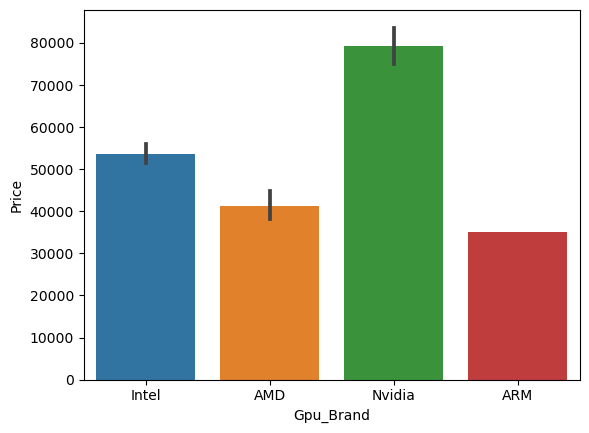

In [67]:
sns.barplot(x=df['Gpu_Brand'],y=df['Price'],data=df)

In [68]:
df=df[df['Gpu_Brand']!='ARM']

<AxesSubplot:xlabel='Gpu_Brand', ylabel='count'>

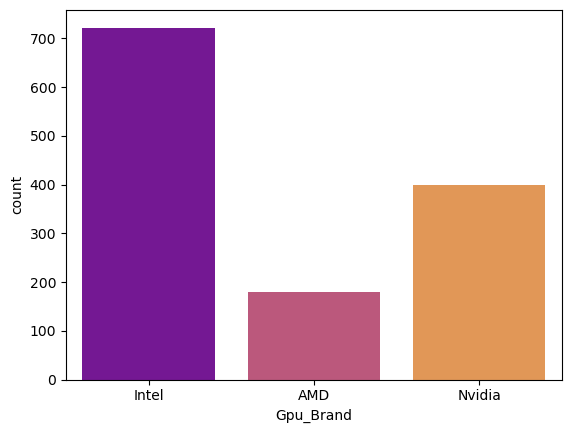

In [69]:
sns.countplot(df['Gpu_Brand'],palette='plasma')

<AxesSubplot:xlabel='Gpu_Brand', ylabel='Price'>

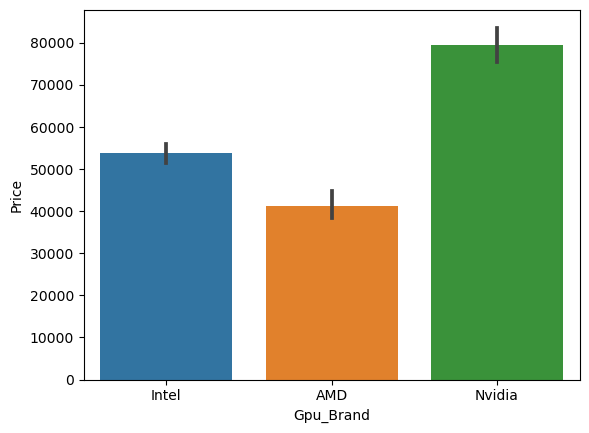

In [70]:
sns.barplot(x=df['Gpu_Brand'],y=df['Price'],estimator=np.mean)

In [71]:
df.drop(['Gpu'],axis=1,inplace=True)

In [72]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

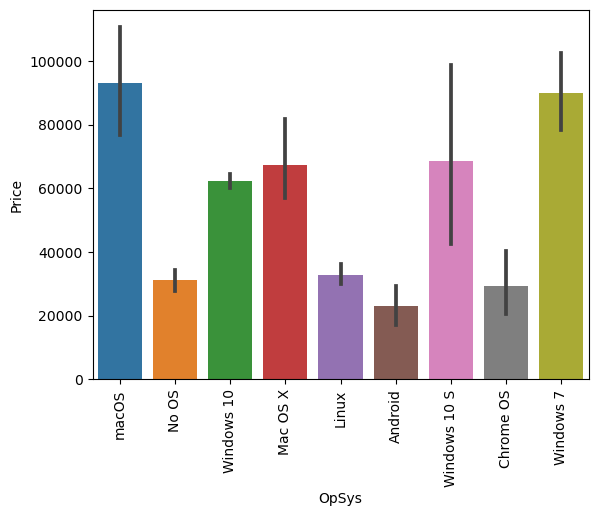

In [73]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

In [74]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [75]:
def subcategory(text):
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    elif text=='macOS' or text=='Mac OS X':
        return 'Mac'
    else:
        return 'others'
df['OpSys']=df['OpSys'].apply(lambda x :subcategory(x))

In [76]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPSPanel,PPI,Cpu_Name,HDD,SSD,Hybrid,FlashStorage,Gpu_Brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128,,,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,,,,,Intel
2,HP,Notebook,8,others,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256,,,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512,,,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,,256,,,Intel


In [77]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPSPanel       0.253320
PPI            0.350885
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

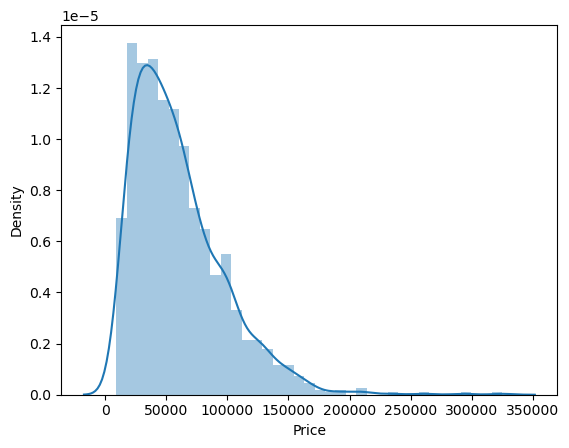

In [78]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

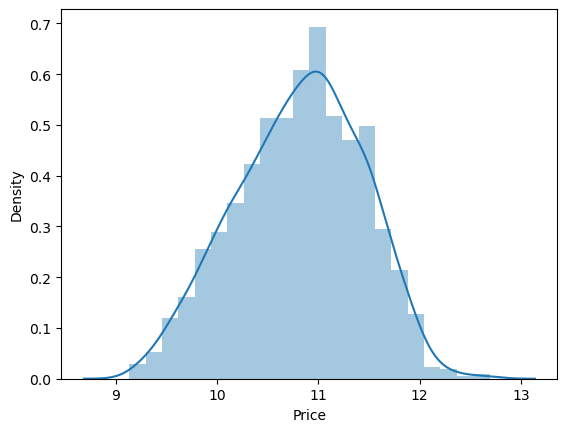

In [79]:
sns.distplot(np.log(df['Price']))

In [80]:
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler,MinMaxScaler;
from sklearn.pipeline import Pipeline;
from sklearn.compose import ColumnTransformer;
from sklearn.preprocessing import LabelEncoder,OneHotEncoder;
from sklearn import metrics;
from sklearn.model_selection import RandomizedSearchCV;
from sklearn.linear_model import LinearRegression,Lasso,Ridge;
from sklearn.tree import DecisionTreeRegressor;
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor;
from xgboost import XGBRegressor;
from sklearn.svm import SVR;
from sklearn.neighbors import KNeighborsRegressor;
from sklearn import tree;

In [81]:
X=df.drop(["Price","HDD","Hybrid","FlashStorage","SSD"],axis=1)
Y=np.log(df['Price'])

In [82]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [83]:
x_train.shape,y_test.shape

((976, 10), (326,))

In [84]:
X

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPSPanel,PPI,Cpu_Name,Gpu_Brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,others,1.86,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,Intel
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,Intel
1300,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,Intel
1301,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,AMD


In [85]:
mapper={i:value for i,value in enumerate(X.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPSPanel',
 7: 'PPI',
 8: 'Cpu_Name',
 9: 'Gpu_Brand'}

In [86]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])],remainder='passthrough')

In [87]:
step2=LinearRegression()
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 9])])),
                ('step2', LinearRegression())])

In [88]:
y_pred=pipe.predict(x_test)

In [89]:
pipe.score(x_test,y_test)

0.7789298701671645

In [90]:
pipe.score(x_train,y_train)

0.8201053634507823

In [91]:
r2_score=metrics.r2_score(y_test,y_pred)
r2_score

0.7789298701671645

In [92]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

0.22080417613417155

In [93]:
mse = metrics.mean_squared_error(y_test,y_pred)
mse

0.08648291580660766

In [132]:
import math
rmse = math.sqrt(mse)
rmse

0.29407977796272844

In [94]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])],remainder='passthrough')
step2=Ridge(alpha=10)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 9])])),
                ('step2', Ridge(alpha=10))])

In [95]:
pipe.score(x_test,y_test)

0.7771024272371145

In [96]:
mae=metrics.mean_absolute_error(y_test,y_pred)
np.exp(mae)

1.2470791987819398

In [97]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])],remainder='passthrough')
step2=Lasso(alpha=0.001)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 9])])),
                ('step2', Lasso(alpha=0.001))])

In [98]:
pipe.score(x_test,y_test)

0.7800727712942452

In [99]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=10)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 9])])),
                ('step2', DecisionTreeRegressor(max_depth=10))])

In [100]:
pipe.score(x_test,y_test)

0.825978259807424

In [101]:
pipe.score(x_train,y_train)

0.9463168001235625

In [102]:
y_pred=pipe.predict(x_test)

In [103]:
mae=metrics.mean_absolute_error(y_test,y_pred)
np.exp(mae)

1.219519544958278

In [104]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,9])],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=100,random_state=42,
                            max_samples=0.5,max_features=0.75,
                            max_depth=17)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 9])])),
                ('step2',
                 RandomForestRegressor(max_depth=17, max_features=0.75,
                                       max_samples=0.5, random_state=42))])

In [105]:
pipe.score(x_test,y_test)

0.8484452154504322

In [106]:
pipe.score(x_train,y_train)

0.9495622819249949

In [107]:
y_pred=pipe.predict(x_test)

In [108]:
mae=metrics.mean_absolute_error(y_test,y_pred)
np.exp(mae)

1.2019185693751346

In [109]:
import pickle;
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [110]:
X.to_csv('traineddata.csv',index=None)

In [111]:
index_list=[0,1,3,8,9]
transformlist=[]
for key,value in mapper.items():
    if key in index_list:
        transformlist.append(value)
transformlist

['Company', 'TypeName', 'OpSys', 'Cpu_Name', 'Gpu_Brand']

In [112]:
train=pd.get_dummies(X,columns=transformlist,drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPSPanel,PPI,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Windows,OpSys_others,Cpu_Name_Intel Core i3,Cpu_Name_Intel Core i5,Cpu_Name_Intel Core i7,Cpu_Name_Other Intel Processor,Gpu_Brand_Intel,Gpu_Brand_Nvidia
0,8,1.37,0,1,226.983005,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [113]:
x_train,x_test,y_train,y_test=train_test_split(train,Y,test_size=0.25,random_state=42)

[Text(0.4774901971734527, 0.98, 'Ram <= 7.0\nsquared_error = 0.388\nsamples = 976\nvalue = 10.822'),
 Text(0.19355028458746024, 0.94, 'Cpu_Name_Other Intel Processor <= 0.5\nsquared_error = 0.184\nsamples = 330\nvalue = 10.202'),
 Text(0.07093398467261237, 0.9, 'Weight <= 1.56\nsquared_error = 0.125\nsamples = 233\nvalue = 10.369'),
 Text(0.016134092233227267, 0.86, 'Weight <= 1.29\nsquared_error = 0.111\nsamples = 26\nvalue = 10.882'),
 Text(0.007170707659212118, 0.82, 'Company_HP <= 0.5\nsquared_error = 0.047\nsamples = 8\nvalue = 11.186'),
 Text(0.0028682830636848474, 0.78, 'Company_Toshiba <= 0.5\nsquared_error = 0.008\nsamples = 4\nvalue = 10.983'),
 Text(0.0014341415318424237, 0.74, 'squared_error = 0.0\nsamples = 1\nvalue = 10.841'),
 Text(0.004302424595527271, 0.74, 'Weight <= 1.225\nsquared_error = 0.002\nsamples = 3\nvalue = 11.031'),
 Text(0.0028682830636848474, 0.7, 'squared_error = 0.0\nsamples = 2\nvalue = 11.061'),
 Text(0.005736566127369695, 0.7, 'squared_error = -0.0\n

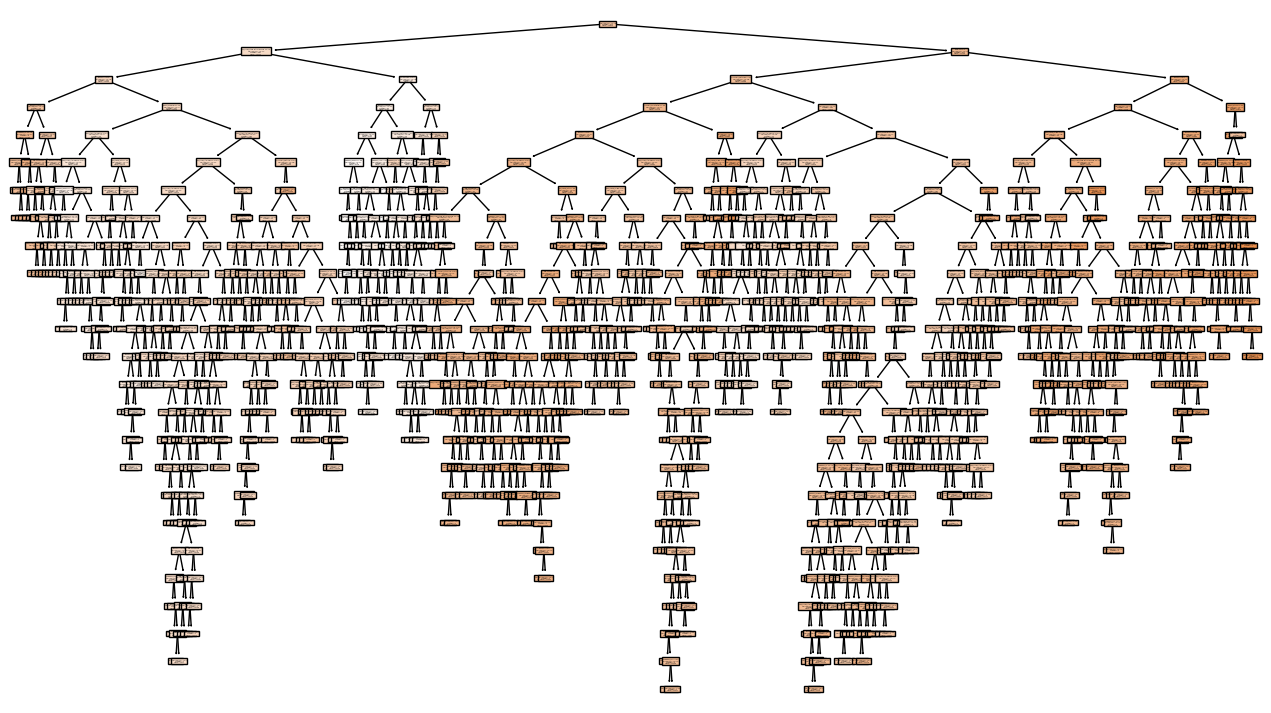

In [114]:
reg=DecisionTreeRegressor(random_state=0)
reg.fit(x_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [115]:
path=reg.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas

In [116]:
alphalist=[]
for alpha in ccp_alphas:
    reg=DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(x_train,y_train)
    alphalist.append(reg)

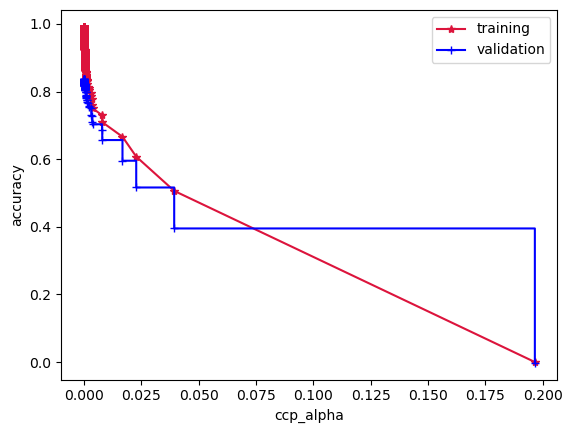

In [117]:
train_score=[reg.score(x_train,y_train)for reg in alphalist]
test_score=[reg.score(x_test,y_test)for reg in alphalist]
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')

plt.plot(ccp_alphas,train_score,marker='*',label='training',color='crimson')
plt.plot(ccp_alphas,test_score,marker='+',label='validation',color='blue',drawstyle='steps-post')
plt.legend()
plt.show()

[Text(0.5, 0.875, 'Ram <= 7.0\nsquared_error = 0.388\nsamples = 976\nvalue = 10.822'),
 Text(0.25, 0.625, 'Cpu_Name_Other Intel Processor <= 0.5\nsquared_error = 0.184\nsamples = 330\nvalue = 10.202'),
 Text(0.125, 0.375, 'squared_error = 0.125\nsamples = 233\nvalue = 10.369'),
 Text(0.375, 0.375, 'squared_error = 0.095\nsamples = 97\nvalue = 9.8'),
 Text(0.75, 0.625, 'Ram <= 14.0\nsquared_error = 0.196\nsamples = 646\nvalue = 11.139'),
 Text(0.625, 0.375, 'TypeName_Notebook <= 0.5\nsquared_error = 0.145\nsamples = 467\nvalue = 10.988'),
 Text(0.5, 0.125, 'squared_error = 0.097\nsamples = 231\nvalue = 11.178'),
 Text(0.75, 0.125, 'squared_error = 0.123\nsamples = 236\nvalue = 10.803'),
 Text(0.875, 0.375, 'squared_error = 0.112\nsamples = 179\nvalue = 11.533')]

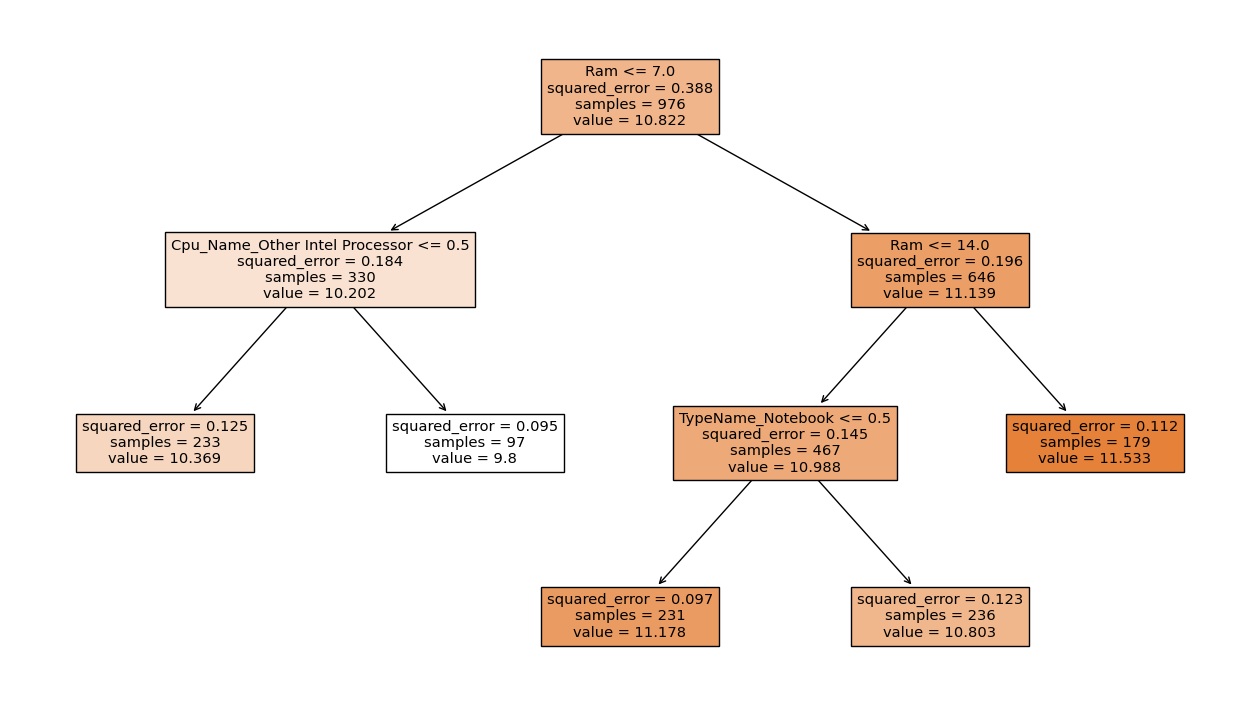

In [118]:
reg=DecisionTreeRegressor(random_state=42,ccp_alpha=0.0085)
reg.fit(x_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [119]:
params={
    'RandomForest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x)for x in np.linspace(100,1200,10)],
            'criterion':['mse','mae'],
            'max_depth':[int(x)for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[int(x)for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14]
        }
    },
    'DecisionForest':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['mse','mae'],
            'max_depth':[int(x)for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[int(x)for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14]
        }
    }
}

In [120]:
scores=[]
for modelname,mp in params.items():
    clf=RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,scoring='neg_mean_squared_error',verbose=1)
    clf.fit(x_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [121]:
scores_df=pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])

In [122]:
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.057318,"(DecisionTreeRegressor(ccp_alpha=0, max_depth=..."
1,DecisionForest,-0.071864,"DecisionTreeRegressor(ccp_alpha=0, criterion='..."


In [123]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.05731785134992656,
  'best_estimator': RandomForestRegressor(ccp_alpha=0, criterion='mse', max_depth=30,
                        min_samples_leaf=2, min_samples_split=14,
                        n_estimators=588)},
 {'model_name': 'DecisionForest',
  'best_score': -0.07186358563908832,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0, criterion='mse', max_depth=22,
                        max_features='auto', min_samples_leaf=2,
                        min_samples_split=14)}]

In [124]:
random_reg=RandomForestRegressor(ccp_alpha=0,criterion='mse',max_depth=15,max_features='sqrt',min_samples_leaf=2,
                          min_samples_split=5,n_estimators=711)
random_reg.fit(x_train,y_train)

RandomForestRegressor(ccp_alpha=0, criterion='mse', max_depth=15,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=711)

In [125]:
random_reg.score(x_test,y_test)

0.8259444135850171

In [126]:
y_pred=random_reg.predict(x_test)

In [127]:
np.exp(metrics.mean_absolute_error(y_test,y_pred))

1.2192179432881642

In [128]:
reg=DecisionTreeRegressor(ccp_alpha=0, criterion='mae', max_depth=22,max_features='auto', min_samples_leaf=10,min_samples_split=10)
reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0, criterion='mae', max_depth=22,
                      max_features='auto', min_samples_leaf=10,
                      min_samples_split=10)

In [129]:
reg.score(x_test,y_test)

0.8006671630509269

In [130]:
import pickle;
file=open('laptoppricepredictor.pkl','wb')
pickle.dump(random_reg,file)
file.close()